<a href="https://colab.research.google.com/github/anintyo/Capstone_M4/blob/main/training_code/Train_YOLOv12_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 21.1 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Tue Feb  3 07:30:00 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Copy the dataset ZIP to the current working directory
!scp -r "/content/drive/MyDrive/Purwadhika/Capstone_M4/construction safety.v1i.yolov12.zip" . # REPLACE THE SOURCE PATH WITH YOURS -> /content/drive/MyDrive/datasets/rock-paper-scissors-14.zip

In [ ]:
!unzip "/content/construction safety.v1i.yolov12.zip"

Archive:  /content/construction safety.v1i.yolov12.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/ppe_0000_jpg.rf.7960e8f628d8a3fc17c6b858dec87a64.jpg  
 extracting: test/images/ppe_0004_jpg.rf.0a9886fc2b97ff81ff4ac5727ef66148.jpg  
 extracting: test/images/ppe_0008_jpg.rf.f3da9c637440a2a4dd256520f2f2e765.jpg  
 extracting: test/images/ppe_0009_jpg.rf.46d6856348dc2ed1e531bb1bc17983f7.jpg  
 extracting: test/images/ppe_0013_jpg.rf.f1bbbf35f9f80c25bd2744171b83ae6f.jpg  
 extracting: test/images/ppe_0014_jpg.rf.5b90e4a7707532584cbf89590d6f1e13.jpg  
 extracting: test/images/ppe_0038_jpg.rf.baf07f7ec6f9fdc82334d58a5a1e6db4.jpg  
 extracting: test/images/ppe_0058_jpg.rf.85334d41a89e79c1ce40b93d32338a3f.jpg  
 extracting: test/images/ppe_0094_jpg.rf.28111b2038f03030f229af28cdbe3484.jpg  
 extracting: test/images/ppe_0104_jpg.rf.8cd1e29b3e584494be060ccbd

In [ ]:
dataset_location = "/content/"

In [ ]:
!ls {dataset_location}

'construction safety.v1i.yolov12.zip'   README.dataset.txt    test
 data.yaml			        README.roboflow.txt   train
 drive				        sample_data	      valid


In [ ]:
!cat {dataset_location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['helmet', 'no-helmet', 'no-vest', 'person', 'vest']

roboflow:
  workspace: personal-project-kej16
  project: construction-safety-gsnvb-jl6el
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/personal-project-kej16/construction-safety-gsnvb-jl6el/dataset/1

In [ ]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2026-02-03 07:30:53--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-03T08%3A12%3A23Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-03T07%3A12%3A23Z&ske=2026-02-03T08%3A12%3A23Z&sks=b&skv=2018-11-09&sig=x%2FCkllPp3ni9UkOcRjSwsppvPW85ybL5ncnFZrZD4hY%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc3MDEwNDE1MywibmJmIjoxNzcwMTAzODUzLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNv

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
results = model.train(
        data=f'{dataset_location}/data.yaml', # Using 20 epochs for faster training
        epochs=20,
        batch=16,
        imgsz=640,
        exist_ok=True,
        patience=5,              # Early stopping if no improvement for 5 epochs
        save_period=5,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,            # Show detailed output during training
        flipud=0.5,              # Augmentation using vertical flip probability
)

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=T

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Lists training artifacts such as weights, result plots, and confusion matrix.
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	     val_batch0_labels.jpg
BoxF1_curve.png			 results.png	     val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch630.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch631.jpg  weights
labels.jpg			 train_batch632.jpg


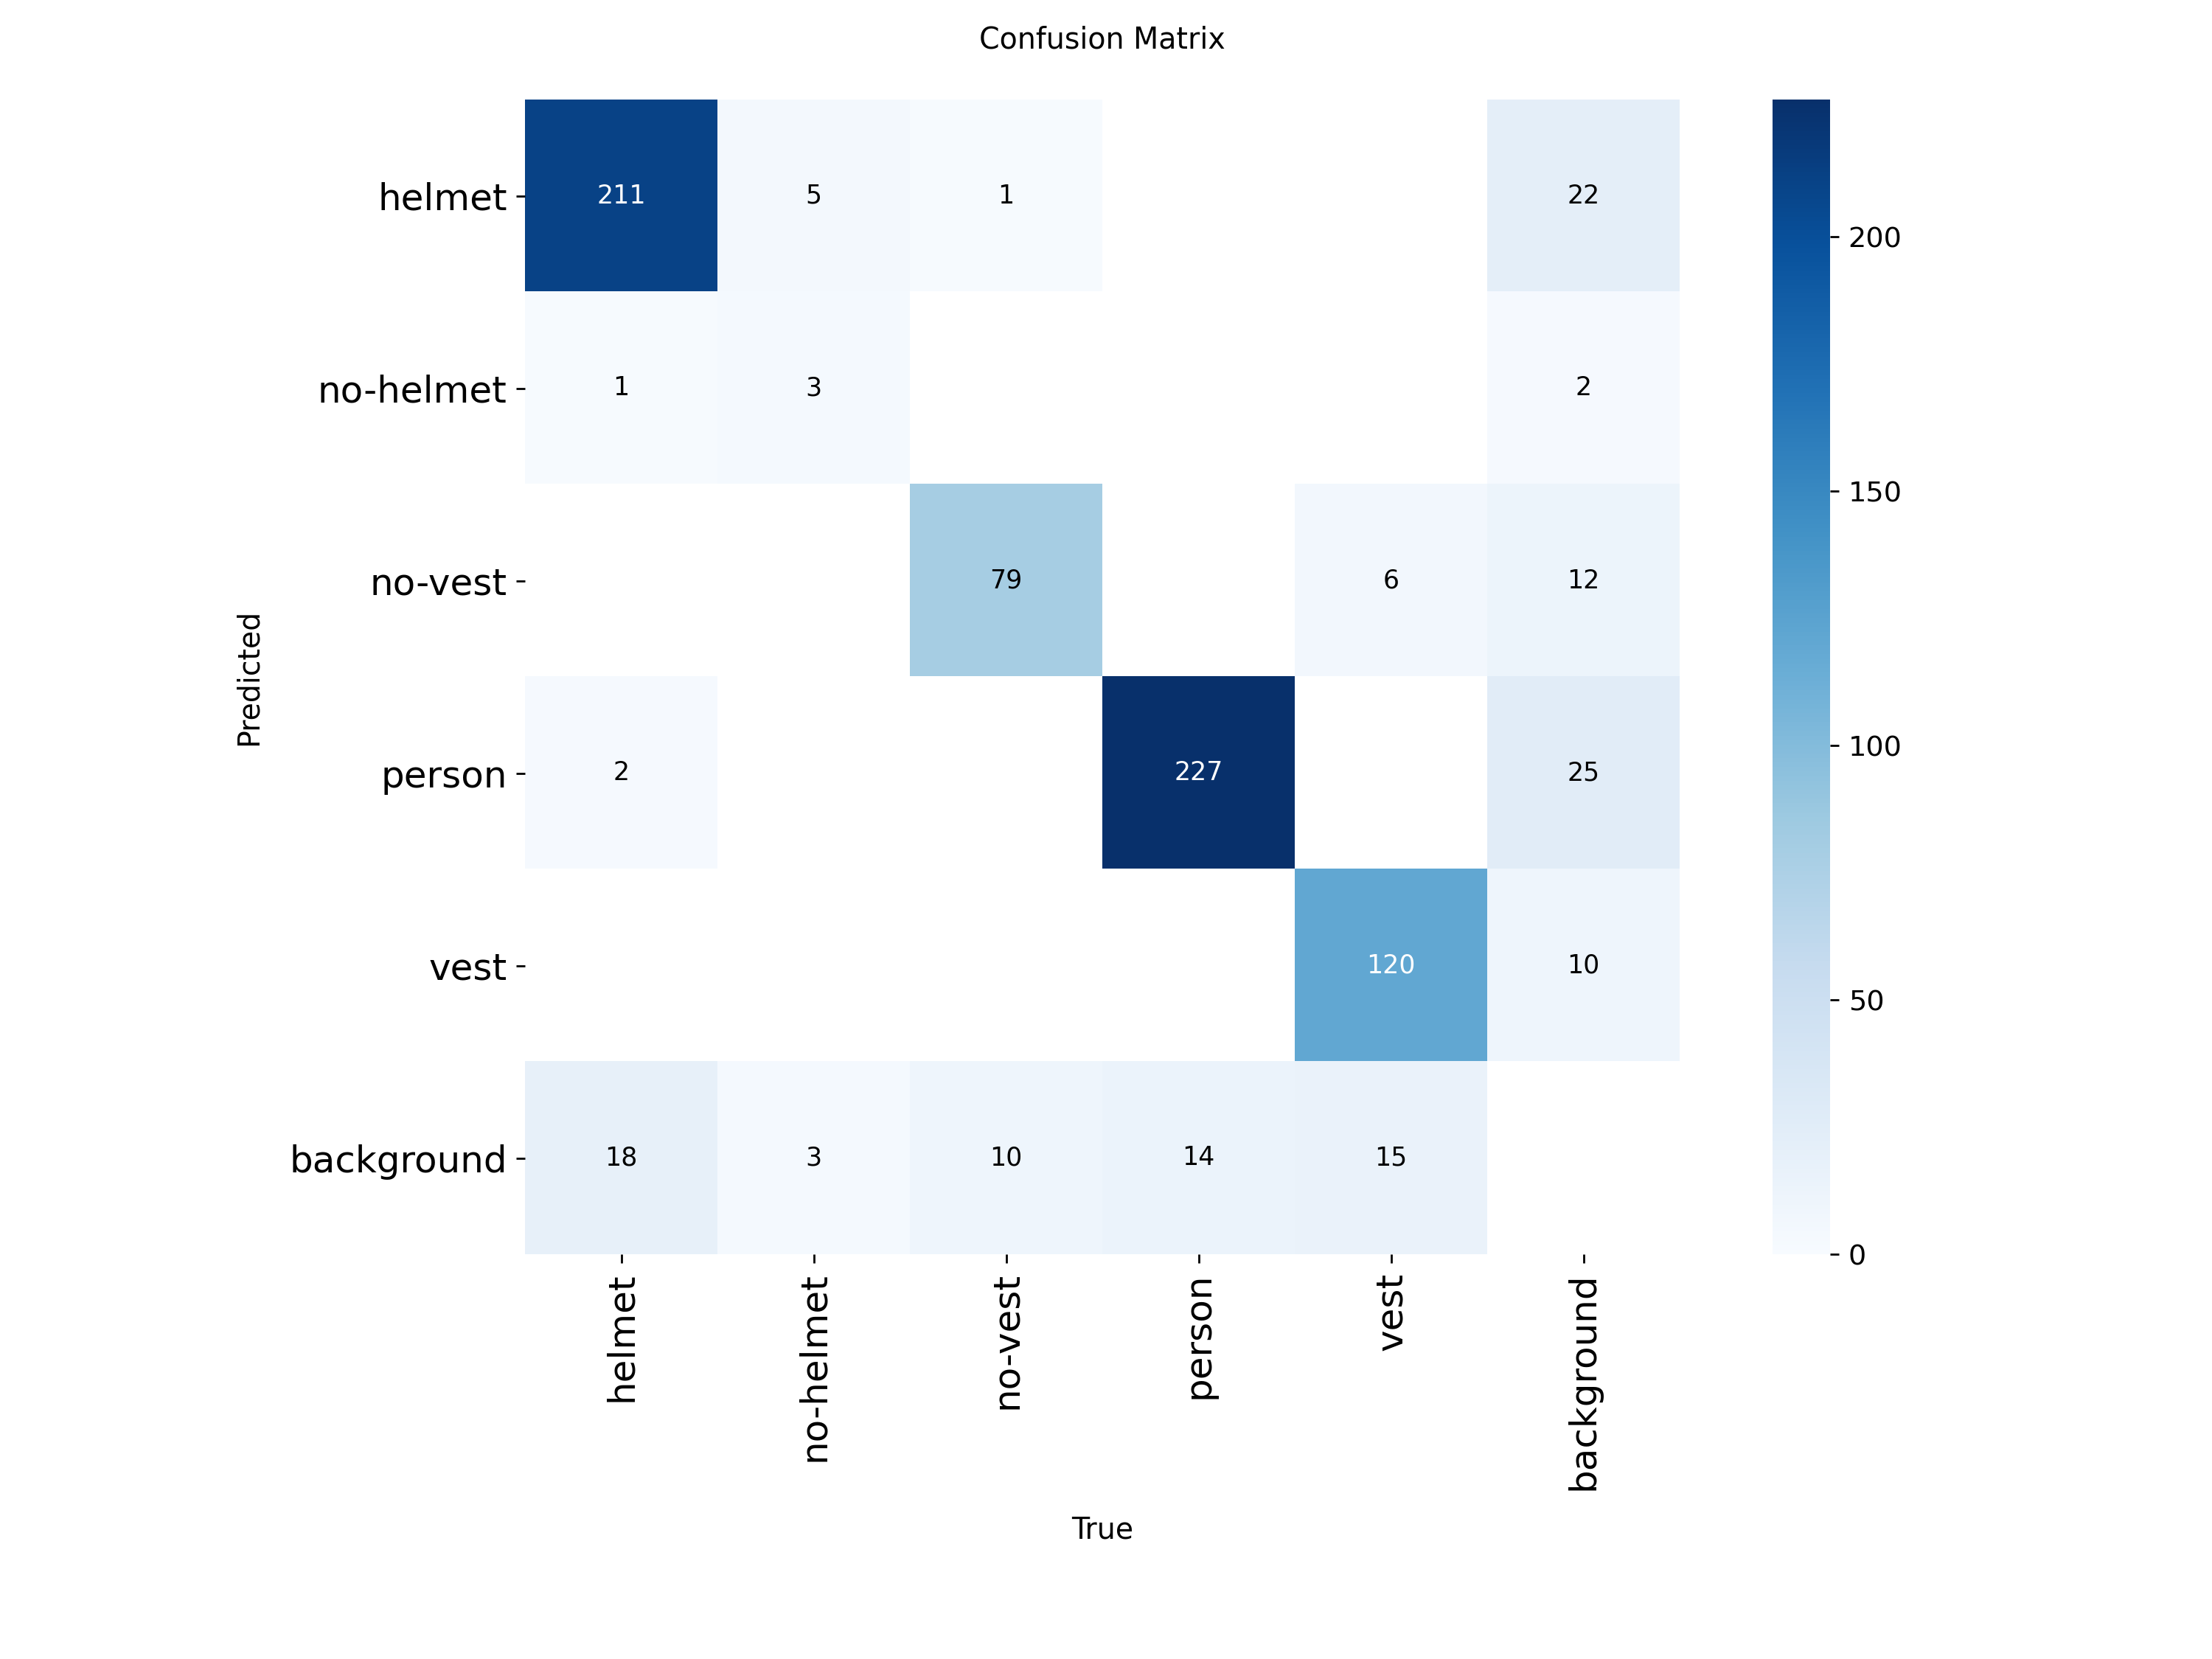

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

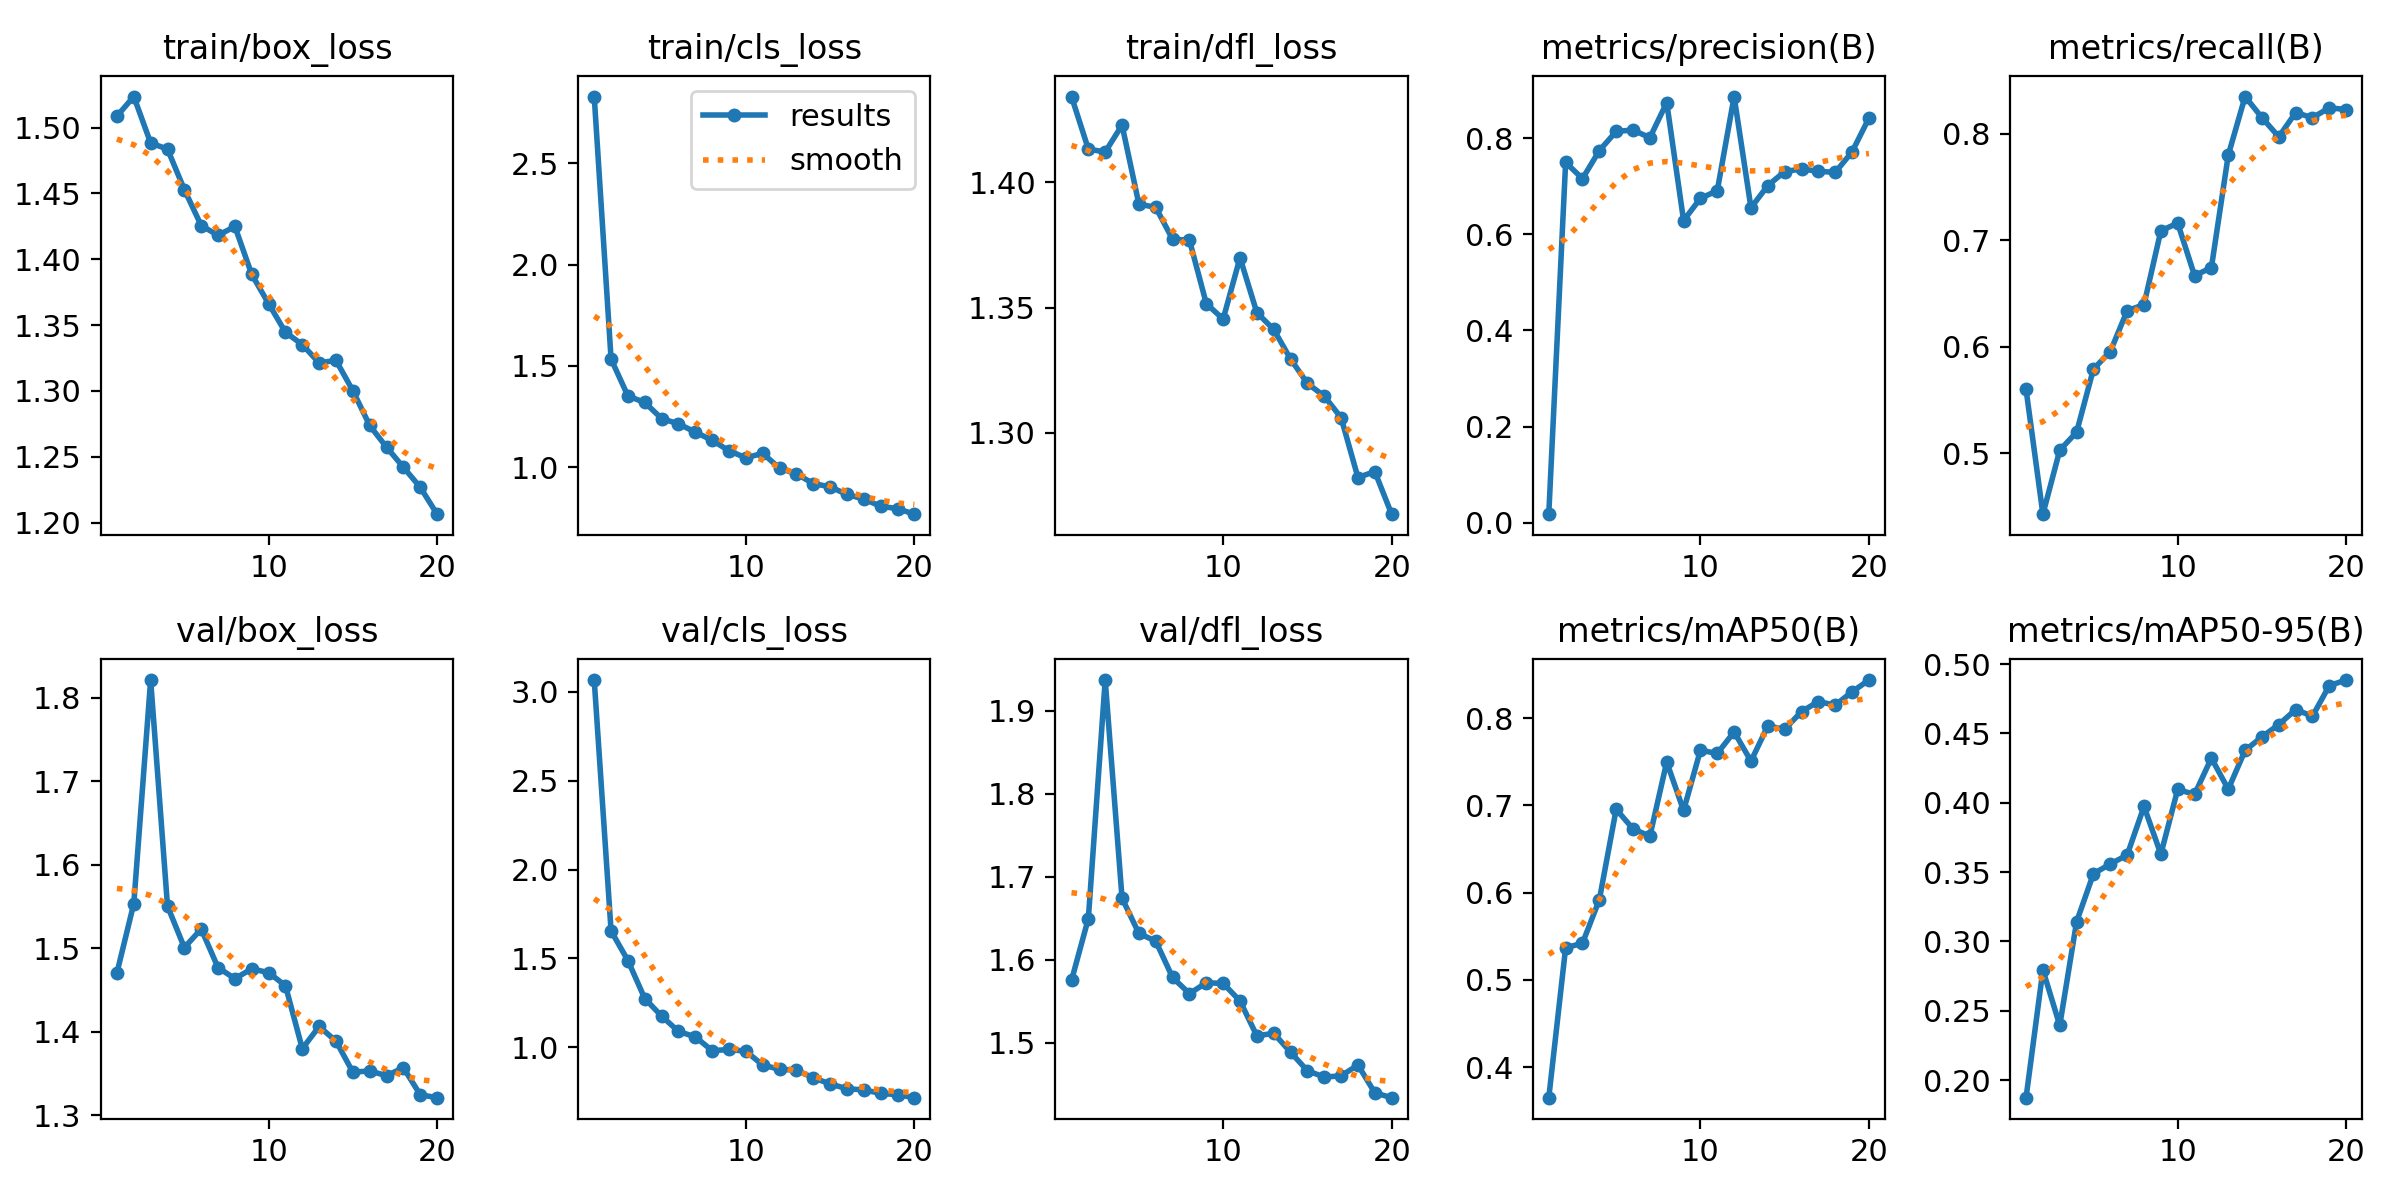

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

ds.classes

['helmet', 'no-helmet', 'no-vest', 'person', 'vest']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [19]:
!scp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/Purwadhika/Capstone_M4/best_construction.pt" # REPLACE "Your_Folder" with your desired folder in Google Drive